<a href="https://colab.research.google.com/github/Rociosamudio/DataScience-Prediccion-de-precio-de-computadoras/blob/main/KPI_ROD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd #DF
import matplotlib.pyplot as plt #graficos
import seaborn as sns #colores


In [11]:
from google.colab import drive
drive.mount('/content/drive')
ruta_archivo : '/content/drive/MyDrive/PROYECTO_INFRA/Enero a agosto.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df_infra = pd.read_excel('/content/drive/MyDrive/PROYECTO_INFRA/Enero a agosto.xlsx')

In [15]:
print(df_infra.head())

  Tipo evento      Id Aeropuerto                    1er Nivel  \
0   Operativo  255838        EZE  Recursos AA2000 Lado Tierra   
1   Operativo  255836        EZE  Recursos AA2000 Lado Tierra   
2   Operativo  255833        EZE    Recursos AA2000 Lado Aire   
3   Operativo  255831        EZE  Recursos AA2000 Lado Tierra   
4   Operativo  255830        EZE  Recursos AA2000 Lado Tierra   

                       2do Nivel                          3er Nivel  \
0                     Ascensores             Ascensores de personas   
1                          Baños                Mingitorio - Tapado   
2  Posiciones de estacionamiento  Posición con pasarela telescópica   
3                          Baños                Mingitorio - Tapado   
4                          Baños                           Rejillas   

   Descripción  Acción Correctiva Prog.       Fec. Inicio  ... EquipoTercero  \
0          NaN                NaN    NO  28/08/2025 23:46  ...             0   
1          NaN        

#Eventos atendido por mantenimiento

In [19]:
total_eventos = df_infra['Id'].count() #Total de eventos

#Eventos atendidos por las 4 áreas de mantenimiento
eventos_mantenimiento = df_infra[df_infra['Responsable'].isin([
    'EZE Mantenimiento Infra',
    'EZE Mantenimiento Electricidad',
    'EZE Mantenimiento Termo',
    'EZE Mantenimiento Electrónica'
])].shape[0]

# Calcular el porcentaje total
porcentaje_mantenimiento = (eventos_mantenimiento / total_eventos) * 100
print(f"% eventos atendido por mantenimiento: {porcentaje_mantenimiento:.2f}%")

% eventos atendido por mantenimiento: 77.38%


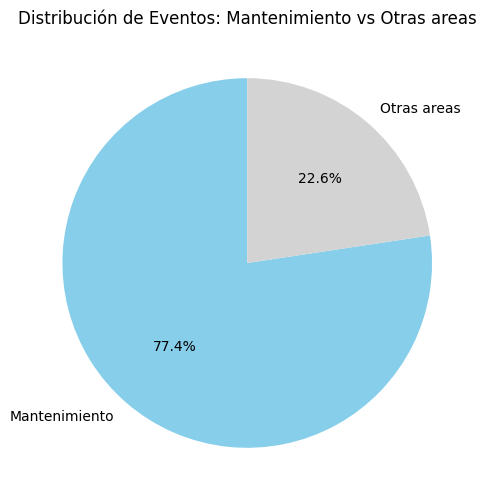

In [22]:
data_grafico = {
    'Categoría': ['Mantenimiento', 'Otras areas'],
    'Cantidad': [eventos_mantenimiento, total_eventos - eventos_mantenimiento]
}

# Convertir el diccionario a un DataFrame de pandas
df_grafico = pd.DataFrame(data_grafico)

# Crear el gráfico de torta usando la librería matplotlib
plt.figure(figsize=(8, 6))
plt.pie(df_grafico['Cantidad'], labels=df_grafico['Categoría'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgrey'])
plt.title('Distribución de Eventos: Mantenimiento vs Otras areas')
plt.show()

In [27]:
total_eventos = df_infra['Id'].count()# total de eventos en el DataFrame


conteo_areas = df_infra[df_infra['Responsable'].isin([
    'EZE Mantenimiento Infra',
    'EZE Mantenimiento Electricidad',
    'EZE Mantenimiento Termo',
    'EZE Mantenimiento Electrónica'
])]['Responsable'].value_counts()
# Contar los eventos de mantenimiento

#porcentaje de cada área
porcentaje_areas = (conteo_areas / total_eventos) * 100

print("Conteo de eventos por área de mantenimiento:")
print(conteo_areas)
print("\nPercentaje de eventos sobre el total:")
print(porcentaje_areas)


Conteo de eventos por área de mantenimiento:
Responsable
EZE Mantenimiento Infra           6593
EZE Mantenimiento Termo           2053
EZE Mantenimiento Electricidad     879
EZE Mantenimiento Electrónica      221
Name: count, dtype: int64

Percentaje de eventos sobre el total:
Responsable
EZE Mantenimiento Infra           52.346169
EZE Mantenimiento Termo           16.300119
EZE Mantenimiento Electricidad     6.978960
EZE Mantenimiento Electrónica      1.754665
Name: count, dtype: float64


#HS promedio

In [25]:
df_infra['Fec. Inicio'] = pd.to_datetime(df_infra['Fec. Inicio'], dayfirst=True, errors='coerce') # Convertir las columnas de fecha a formato datetime
df_infra['Fec. Fin'] = pd.to_datetime(df_infra['Fec. Fin'], dayfirst=True, errors='coerce')

/tmp/ipython-input-1841663223.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_infra['Fec. Fin'] = pd.to_datetime(df_infra['Fec. Fin'], dayfirst=True, errors='coerce')


In [28]:
eventos_cerrados = df_infra[ # Filtrar los eventos 'cerrados'
    df_infra['Responsable'].isin([
        'EZE Mantenimiento Infra',
        'EZE Mantenimiento Electricidad',
        'EZE Mantenimiento Termo',
        'EZE Mantenimiento Electrónica'
    ]) & df_infra['Fec. Fin'].notna()
].copy() #.copy() por el SettingWithCopyWarning


eventos_cerrados['Duracion Horas'] = (
    (eventos_cerrados['Fec. Fin'] - eventos_cerrados['Fec. Inicio']).dt.total_seconds() / 3600 # duración de cada evento en horas
)


promedio_duracion = eventos_cerrados['Duracion Horas'].mean() #Calcular el promedio de la duración

#resultado final
print(f"El promedio de horas de cierre de eventos de Mantenimiento es: {promedio_duracion:.2f} horas.")

El promedio de horas de cierre de eventos de Mantenimiento es: 39.91 horas.


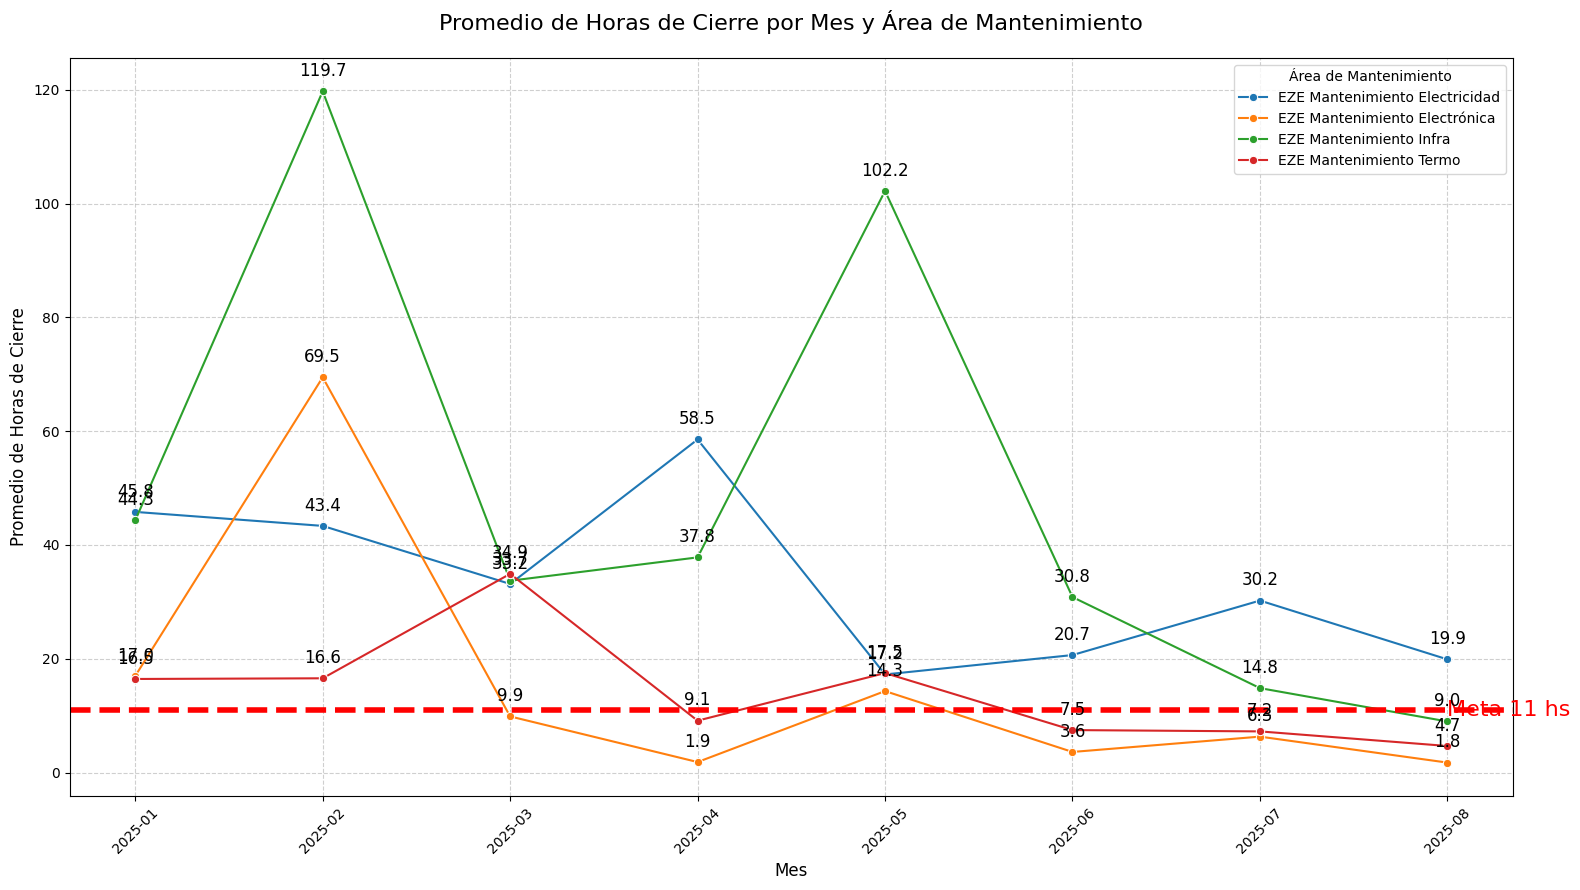

In [32]:
# 1. Preparación de los datos
df_mantenimiento = df_infra[
    df_infra['Responsable'].isin([
        'EZE Mantenimiento Infra',
        'EZE Mantenimiento Electricidad',
        'EZE Mantenimiento Termo',
        'EZE Mantenimiento Electrónica'
    ]) & df_infra['Fec. Fin'].notna()
].copy()

df_mantenimiento['Duracion Horas'] = (df_mantenimiento['Fec. Fin'] - df_mantenimiento['Fec. Inicio']).dt.total_seconds() / 3600
df_mantenimiento['Mes'] = df_mantenimiento['Fec. Inicio'].dt.to_period('M')
promedio_por_mes = df_mantenimiento.groupby(['Mes', 'Responsable'])['Duracion Horas'].mean().reset_index()
promedio_por_mes['Mes_str'] = promedio_por_mes['Mes'].astype(str)

# 2. Creación del gráfico
plt.figure(figsize=(16, 9))
sns.lineplot(
    data=promedio_por_mes,
    x='Mes_str',
    y='Duracion Horas',
    hue='Responsable',
    marker='o'
)

# Agregar la línea de la meta de 11 horas y su etiqueta
plt.axhline(y=11, color='red', linestyle='--', linewidth=4)
plt.text(promedio_por_mes['Mes_str'].iloc[-1], 11, 'Meta 11 hs', color='red', ha='left', va='center', fontsize=16)

# 3. Agregar las etiquetas de datos de forma inteligente
etiquetas_ya_usadas = {}
for i, row in promedio_por_mes.iterrows():
    # Coordenadas del punto
    x = row['Mes_str']
    y = row['Duracion Horas']
    texto = f"{y:.1f}"

    # Lógica para evitar superposiciones
    desplazamiento_y = 0
    while (x, y + desplazamiento_y) in etiquetas_ya_usadas:
        desplazamiento_y += 5 # Desplaza la etiqueta 5 unidades hacia arriba

    etiquetas_ya_usadas[(x, y + desplazamiento_y)] = True

    # Agrega la etiqueta con desplazamiento
    plt.text(x, y + desplazamiento_y + 2, texto, ha='center', va='bottom', fontsize=12)

# Configuración del gráfico
plt.title('Promedio de Horas de Cierre por Mes y Área de Mantenimiento', fontsize=16, pad=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Promedio de Horas de Cierre', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Área de Mantenimiento', loc='upper right')
plt.tight_layout()
plt.show()


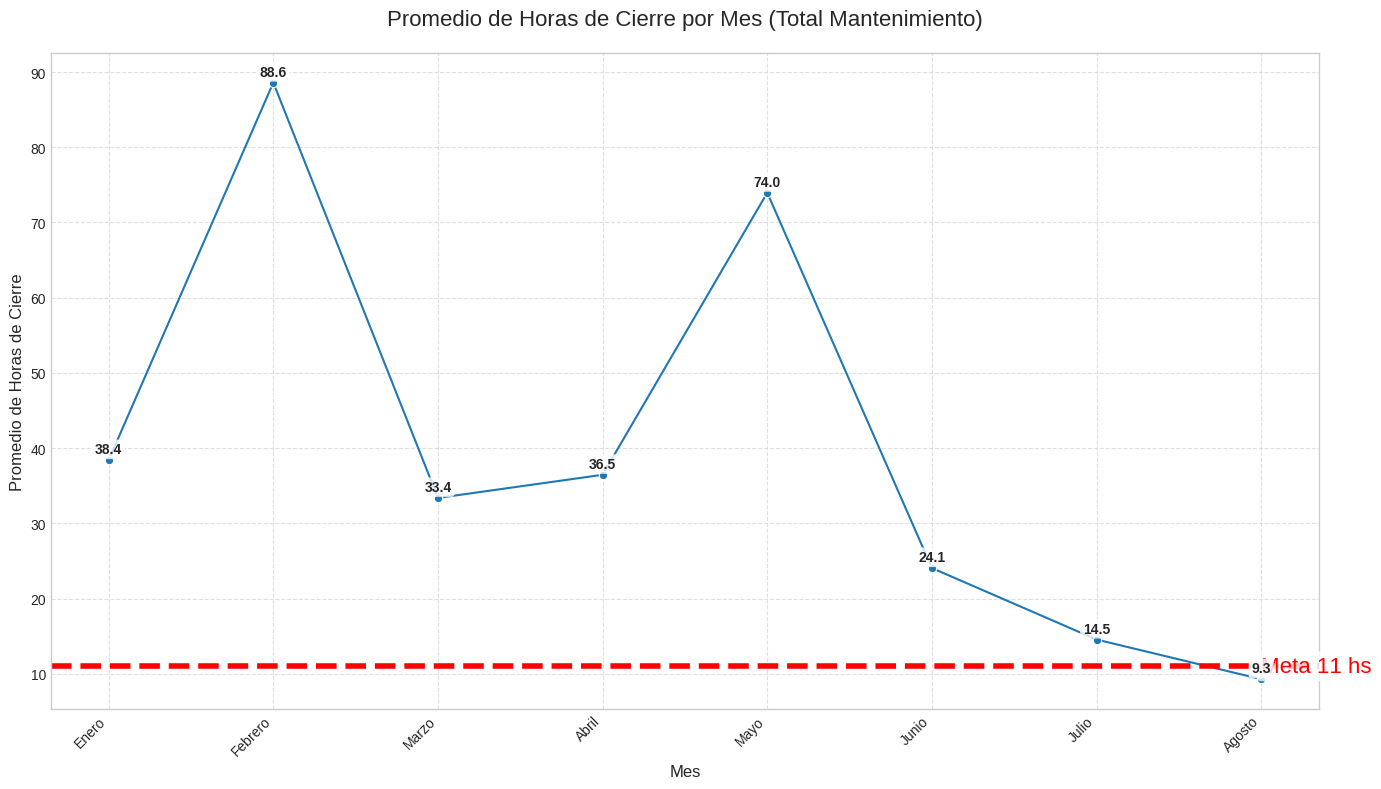

In [37]:
# Calcular la duración de cada evento en horas
df_mantenimiento['Duracion Horas'] = (df_mantenimiento['Fec. Fin'] - df_mantenimiento['Fec. Inicio']).dt.total_seconds() / 3600

# Extraer el mes y agrupar para el gráfico
df_mantenimiento['Mes_Numero'] = df_mantenimiento['Fec. Inicio'].dt.month
df_mantenimiento['Mes_Nombre'] = df_mantenimiento['Fec. Inicio'].dt.strftime('%B')

# Mapear a nombres de meses en español
mapeo_meses = {
    'January': 'Enero', 'February': 'Febrero', 'March': 'Marzo', 'April': 'Abril',
    'May': 'Mayo', 'June': 'Junio', 'July': 'Julio', 'August': 'Agosto',
    'September': 'Septiembre', 'October': 'Octubre', 'November': 'Noviembre',
    'December': 'Diciembre'
}
df_mantenimiento['Mes_Nombre'] = df_mantenimiento['Mes_Nombre'].map(mapeo_meses)

# Agrupar los datos para obtener el promedio de horas por mes (total de las 4 áreas)
promedio_por_mes = df_mantenimiento.groupby(['Mes_Numero', 'Mes_Nombre'])['Duracion Horas'].mean().reset_index()

# 2. Creación del gráfico
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=promedio_por_mes,
    x='Mes_Numero',
    y='Duracion Horas',
    marker='o'
)

# 3. Ajustes de visualización
plt.axhline(y=11, color='red', linestyle='--', linewidth=4)
plt.text(
    promedio_por_mes['Mes_Numero'].max(), 11,
    'Meta 11 hs',
    color='red',
    ha='left',
    va='center',
    fontsize=16,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
)

# Mapear los números de mes a nombres en el eje x
meses_unicos = promedio_por_mes.sort_values('Mes_Numero')['Mes_Nombre'].unique()
plt.xticks(
    ticks=promedio_por_mes['Mes_Numero'].unique(),
    labels=meses_unicos,
    rotation=45,
    ha='right'
)

# Agregar las etiquetas de datos a cada punto
for i, row in promedio_por_mes.iterrows():
    plt.text(
        row['Mes_Numero'],
        row['Duracion Horas'] + 0.5,
        f"{row['Duracion Horas']:.1f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
    )

# Configuración final del gráfico
plt.title('Promedio de Horas de Cierre por Mes (Total Mantenimiento)', fontsize=16, pad=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Promedio de Horas de Cierre', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#KPI cumplimineto

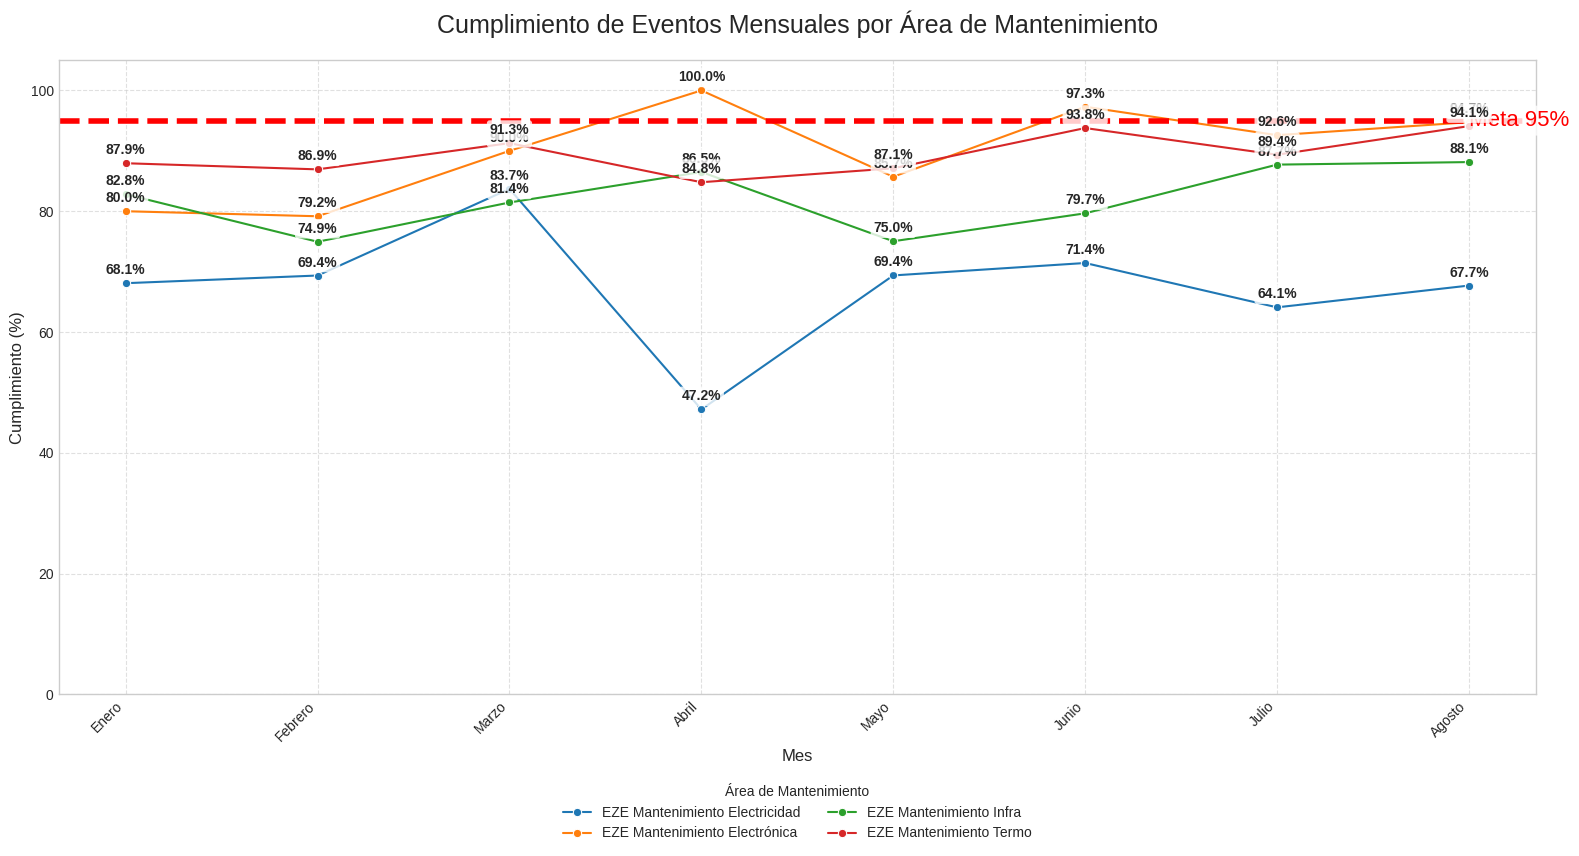

In [35]:
# 1. Preparación de los datos
df_mantenimiento = df_infra[
    df_infra['Responsable'].isin([
        'EZE Mantenimiento Infra',
        'EZE Mantenimiento Electricidad',
        'EZE Mantenimiento Termo',
        'EZE Mantenimiento Electrónica'
    ]) & df_infra['Fec. Fin'].notna()
].copy()

df_mantenimiento['Duracion Horas'] = (df_mantenimiento['Fec. Fin'] - df_mantenimiento['Fec. Inicio']).dt.total_seconds() / 3600

# Definir el KPI: el evento cumple si la duración es <= 11 horas
df_mantenimiento['Cumplimiento'] = (df_mantenimiento['Duracion Horas'] <= 11)

# Extraer el mes y el año y agrupar para el gráfico
df_mantenimiento['Mes_Numero'] = df_mantenimiento['Fec. Inicio'].dt.month
df_mantenimiento['Mes_Nombre'] = df_mantenimiento['Fec. Inicio'].dt.strftime('%B')

# Mapear a nombres de meses en español
mapeo_meses = {
    'January': 'Enero', 'February': 'Febrero', 'March': 'Marzo', 'April': 'Abril',
    'May': 'Mayo', 'June': 'Junio', 'July': 'Julio', 'August': 'Agosto',
    'September': 'Septiembre', 'October': 'Octubre', 'November': 'Noviembre',
    'December': 'Diciembre'
}
df_mantenimiento['Mes_Nombre'] = df_mantenimiento['Mes_Nombre'].map(mapeo_meses)

kpi_por_mes = df_mantenimiento.groupby(['Mes_Numero', 'Mes_Nombre', 'Responsable'])['Cumplimiento'].mean().reset_index()

# Convertir la proporción a porcentaje
kpi_por_mes['Cumplimiento %'] = kpi_por_mes['Cumplimiento'] * 100

# 2. Creación del gráfico
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(16, 10))
sns.lineplot(
    data=kpi_por_mes,
    x='Mes_Numero',
    y='Cumplimiento %',
    hue='Responsable',
    marker='o',
    dashes=False
)

# 3. Ajustes de visualización
plt.legend(title='Área de Mantenimiento', loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2, fontsize='medium')

# Mapear los números de mes a nombres en el eje x
meses_unicos = kpi_por_mes.sort_values('Mes_Numero')['Mes_Nombre'].unique()
plt.xticks(
    ticks=kpi_por_mes['Mes_Numero'].unique(),
    labels=meses_unicos,
    rotation=45,
    ha='right'
)

# Agregar la línea de meta y su etiqueta
plt.axhline(y=95, color='red', linestyle='--', linewidth=4)
plt.text(
    kpi_por_mes['Mes_Numero'].iloc[-1], 95,
    'Meta 95%',
    color='red',
    ha='left',
    va='center',
    fontsize=16,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
)

# Agregar las etiquetas de datos y evitar superposiciones
for i, row in kpi_por_mes.iterrows():
    plt.text(
        row['Mes_Numero'],
        row['Cumplimiento %'] + 1,
        f"{row['Cumplimiento %']:.1f}%",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
    )

# Configuración final del gráfico
plt.title('Cumplimiento de Eventos Mensuales por Área de Mantenimiento', fontsize=18, pad=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cumplimiento (%)', fontsize=12)
plt.ylim(0, 105)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

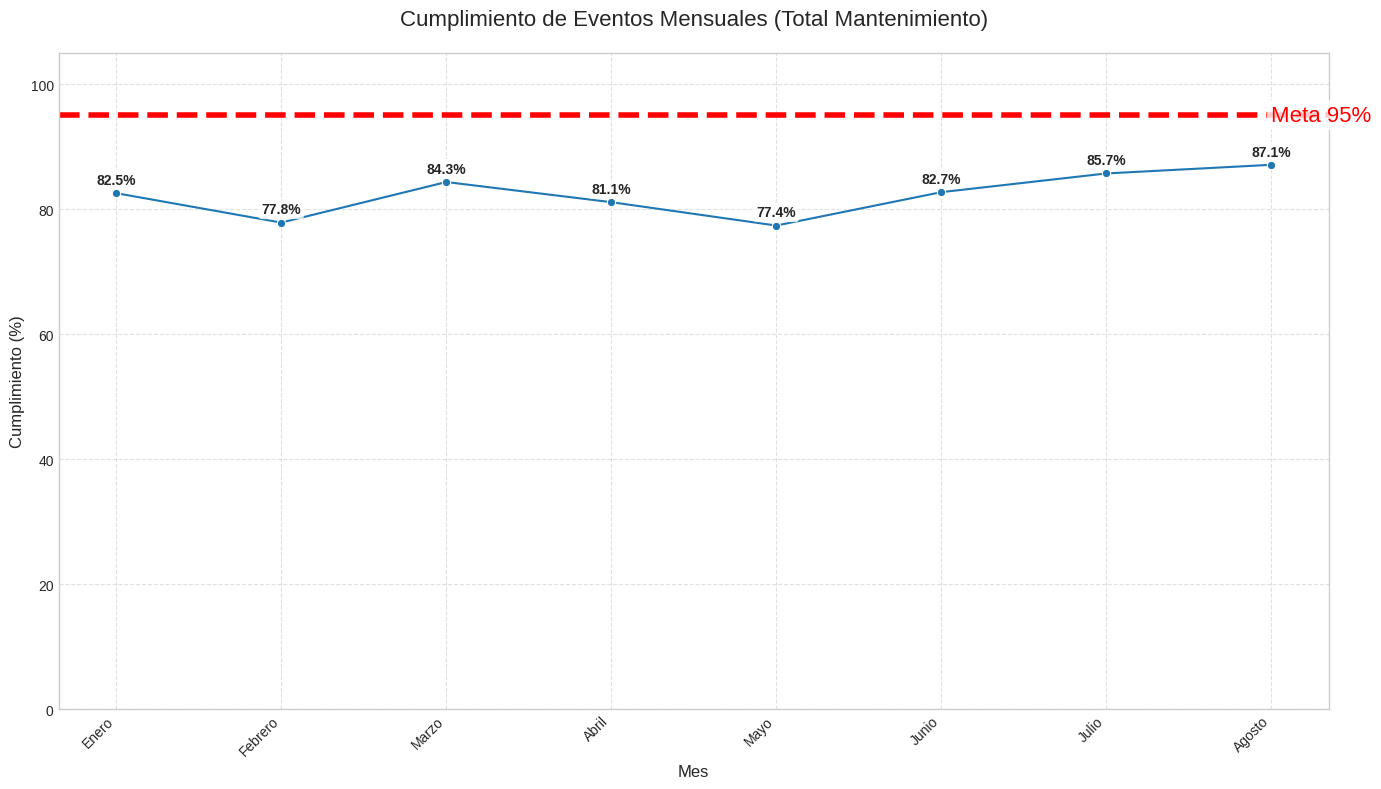

In [38]:
# Definir el KPI: el evento cumple si la duración es <= 11 horas
df_mantenimiento['Cumplimiento'] = (df_mantenimiento['Duracion Horas'] <= 11)

# Extraer el mes y agrupar para el gráfico
df_mantenimiento['Mes_Numero'] = df_mantenimiento['Fec. Inicio'].dt.month
df_mantenimiento['Mes_Nombre'] = df_mantenimiento['Fec. Inicio'].dt.strftime('%B')

# Mapear a nombres de meses en español
mapeo_meses = {
    'January': 'Enero', 'February': 'Febrero', 'March': 'Marzo', 'April': 'Abril',
    'May': 'Mayo', 'June': 'Junio', 'July': 'Julio', 'August': 'Agosto',
    'September': 'Septiembre', 'October': 'Octubre', 'November': 'Noviembre',
    'December': 'Diciembre'
}
df_mantenimiento['Mes_Nombre'] = df_mantenimiento['Mes_Nombre'].map(mapeo_meses)

# Agrupar los datos para obtener el porcentaje de cumplimiento por mes
# (TOTAL de las 4 áreas)
kpi_total_por_mes = df_mantenimiento.groupby(['Mes_Numero', 'Mes_Nombre'])['Cumplimiento'].mean().reset_index()

# Convertir la proporción a porcentaje
kpi_total_por_mes['Cumplimiento %'] = kpi_total_por_mes['Cumplimiento'] * 100

# 2. Creación del gráfico
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=kpi_total_por_mes,
    x='Mes_Numero',
    y='Cumplimiento %',
    marker='o'
)

# 3. Ajustes de visualización

# Agregar la línea de la meta del 95%
plt.axhline(y=95, color='red', linestyle='--', linewidth=4)
plt.text(
    kpi_total_por_mes['Mes_Numero'].max(), 95,
    'Meta 95%',
    color='red',
    ha='left',
    va='center',
    fontsize=16,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
)

# Mapear los números de mes a nombres en el eje x
meses_unicos = kpi_total_por_mes.sort_values('Mes_Numero')['Mes_Nombre'].unique()
plt.xticks(
    ticks=kpi_total_por_mes['Mes_Numero'].unique(),
    labels=meses_unicos,
    rotation=45,
    ha='right'
)

# Agregar las etiquetas de datos a cada punto
for i, row in kpi_total_por_mes.iterrows():
    plt.text(
        row['Mes_Numero'],
        row['Cumplimiento %'] + 1,
        f"{row['Cumplimiento %']:.1f}%",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
    )

# Configuración final del gráfico
plt.title('Cumplimiento de Eventos Mensuales (Total Mantenimiento)', fontsize=16, pad=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cumplimiento (%)', fontsize=12)
plt.ylim(0, 105)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#INFRA

In [40]:
# Asegurar que las columnas de fecha sean de tipo datetime
df_infra['Fec. Inicio'] = pd.to_datetime(df_infra['Fec. Inicio'], dayfirst=True, errors='coerce')
df_infra['Fec. Fin'] = pd.to_datetime(df_infra['Fec. Fin'], dayfirst=True, errors='coerce')

# Filtrar el DataFrame solo para 'EZE Mantenimiento Infra'
df_infra_filtrado = df_infra[df_infra['Responsable'] == 'EZE Mantenimiento Infra'].copy()

# Calcular la duración de los eventos cerrados
df_infra_cerrados = df_infra_filtrado[df_infra_filtrado['Fec. Fin'].notna()].copy()
df_infra_cerrados['Duracion Horas'] = (df_infra_cerrados['Fec. Fin'] - df_infra_cerrados['Fec. Inicio']).dt.total_seconds() / 3600

total de eventos

In [41]:
cantidad_total = df_infra_filtrado.shape[0]
print(f"Cantidad total de eventos de Mantenimiento Infra: {cantidad_total}")

Cantidad total de eventos de Mantenimiento Infra: 6593


eventos cerrados

In [42]:
cantidad_cerrados = df_infra_filtrado['Fec. Fin'].count()
print(f"Cantidad de eventos cerrados de Mantenimiento Infra: {cantidad_cerrados}")

Cantidad de eventos cerrados de Mantenimiento Infra: 6484


Eventos cerrados

In [43]:
cantidad_abiertos = cantidad_total - cantidad_cerrados
print(f"Cantidad de eventos abiertos de Mantenimiento Infra: {cantidad_abiertos}")

Cantidad de eventos abiertos de Mantenimiento Infra: 109


Promedio de HS

In [44]:
promedio_horas = df_infra_cerrados['Duracion Horas'].mean()
print(f"Promedio de horas de cierre de Mantenimiento Infra: {promedio_horas:.2f} horas")

Promedio de horas de cierre de Mantenimiento Infra: 49.50 horas


% Cumplimiento

In [47]:
# Asegurar que las columnas de fecha son de tipo datetime
df_infra['Fec. Inicio'] = pd.to_datetime(df_infra['Fec. Inicio'], dayfirst=True, errors='coerce')
df_infra['Fec. Fin'] = pd.to_datetime(df_infra['Fec. Fin'], dayfirst=True, errors='coerce')

# 1. Filtrar solo los eventos de 'EZE Mantenimiento Infra' que están cerrados
df_infra_cerrados = df_infra[
    (df_infra['Responsable'] == 'EZE Mantenimiento Infra') &
    (df_infra['Fec. Fin'].notna())
].copy()

# 2. Extraer el mes y el año de la fecha de CIERRE
df_infra_cerrados['Mes_Cierre'] = df_infra_cerrados['Fec. Fin'].dt.to_period('M')

# 3. Contar la cantidad de eventos cerrados por mes
conteo_cierre_mensual = df_infra_cerrados.groupby('Mes_Cierre')['Id'].count().reset_index()
conteo_cierre_mensual['Mes_Cierre'] = conteo_cierre_mensual['Mes_Cierre'].astype(str)

# 4. Obtener el total de eventos para el porcentaje
# Aquí, el denominador puede ser el total de eventos que se ABRIERON en cada mes,
# o el total de eventos en general, según lo que busques medir.
# Para medir la tasa de cierre sobre el total de trabajo asignado, es mejor
# usar el total de eventos abiertos en el mes.
df_infra_abiertos = df_infra[
    (df_infra['Responsable'] == 'EZE Mantenimiento Infra') &
    (df_infra['Fec. Inicio'].notna())
].copy()
df_infra_abiertos['Mes_Apertura'] = df_infra_abiertos['Fec. Inicio'].dt.to_period('M')
conteo_apertura_mensual = df_infra_abiertos.groupby('Mes_Apertura')['Id'].count().reset_index()
conteo_apertura_mensual['Mes_Apertura'] = conteo_apertura_mensual['Mes_Apertura'].astype(str)

# 5. Unir los dataframes para calcular el porcentaje de cierre
df_resultados = pd.merge(conteo_cierre_mensual, conteo_apertura_mensual,
                         left_on='Mes_Cierre', right_on='Mes_Apertura', how='outer')

# Llenar valores nulos con 0
df_resultados = df_resultados.fillna(0)

# 6. Calcular el porcentaje de cierre mensual
df_resultados['Porcentaje_Cierre'] = (df_resultados['Id_x'] / df_resultados['Id_y']) * 100

# Mostrar los resultados
print("Tasa de Cierre Mensual para Mantenimiento Infra:")
print(df_resultados[['Mes_Cierre', 'Porcentaje_Cierre']])

# Nota: También puedes usar un gráfico para visualizar esta tasa de cierre a lo largo del tiempo.

Tasa de Cierre Mensual para Mantenimiento Infra:
  Mes_Cierre  Porcentaje_Cierre
0    2025-01          95.625759
1    2025-02          89.419795
2    2025-03         106.151832
3    2025-04         100.674764
4    2025-05          89.820359
5    2025-06         102.649770
6    2025-07         102.649770
7    2025-08         100.858896


In [48]:
# 2. Calcular las métricas para eventos cerrados en el mismo mes
df_infra_filtrado['Mes_Apertura'] = df_infra_filtrado['Fec. Inicio'].dt.to_period('M')
df_infra_filtrado['Mes_Cierre'] = df_infra_filtrado['Fec. Fin'].dt.to_period('M')

# Filtrar solo eventos abiertos y cerrados en el mismo mes
df_mismo_mes = df_infra_filtrado[df_infra_filtrado['Mes_Apertura'] == df_infra_filtrado['Mes_Cierre']].copy()

# Calcular la duración de estos eventos en horas
df_mismo_mes['Duracion Horas'] = (df_mismo_mes['Fec. Fin'] - df_mismo_mes['Fec. Inicio']).dt.total_seconds() / 3600

# Agrupar por mes para calcular las métricas
tabla_comparativa = df_mismo_mes.groupby('Mes_Apertura').agg(
    Reportadas=('Id', 'count'),  # Total de eventos reportados en ese mes
    Cerradas_Mismo_Mes=('Id', 'count'), # Los eventos de la tabla ya están filtrados
    Tiempo_Respuesta_Mismo_Mes=('Duracion Horas', 'mean')
).reset_index()

# Calcular el porcentaje de cerrados en el mismo mes
# Para esto necesitamos el conteo total de reportadas por mes
total_reportadas_mes = df_infra_filtrado.groupby('Mes_Apertura')['Id'].count().reset_index()
total_reportadas_mes.rename(columns={'Id': 'Total_Reportadas'}, inplace=True)

# Unir con la tabla comparativa para el cálculo final
tabla_comparativa = pd.merge(tabla_comparativa, total_reportadas_mes, on='Mes_Apertura')
tabla_comparativa['Porcentaje_Cerradas'] = (tabla_comparativa['Cerradas_Mismo_Mes'] / tabla_comparativa['Total_Reportadas']) * 100

# Formatear el promedio de horas
tabla_comparativa['Tiempo_Respuesta_Mismo_Mes'] = tabla_comparativa['Tiempo_Respuesta_Mismo_Mes'].round(2)

# Seleccionar y renombrar las columnas finales para que coincidan con tu informe
tabla_comparativa = tabla_comparativa.rename(columns={
    'Mes_Apertura': 'Mes',
    'Total_Reportadas': 'Reportadas',
    'Cerradas_Mismo_Mes': 'Cerradas Mismo Mes',
    'Porcentaje_Cerradas': '% Cerrada Mismo Mes',
    'Tiempo_Respuesta_Mismo_Mes': 'Tiempo Respuesta Mismo Mes'
})

# Limpiar y ordenar la tabla final
tabla_final = tabla_comparativa[['Mes', 'Reportadas', 'Cerradas Mismo Mes', '% Cerrada Mismo Mes', 'Tiempo Respuesta Mismo Mes']]
tabla_final['Mes'] = tabla_final['Mes'].astype(str)

print(tabla_final)

       Mes  Reportadas  Reportadas  Cerradas Mismo Mes  % Cerrada Mismo Mes  \
0  2025-01         787         823                 787            95.625759   
1  2025-02         765         879                 765            87.030717   
2  2025-03         734         764                 734            96.073298   
3  2025-04         703         741                 703            94.871795   
4  2025-05         725         835                 725            86.826347   
5  2025-06         840         868                 840            96.774194   
6  2025-07         849         868                 849            97.811060   
7  2025-08         784         815                 784            96.196319   

   Tiempo Respuesta Mismo Mes  
0                       11.30  
1                       12.54  
2                       17.90  
3                        7.40  
4                       12.75  
5                       19.06  
6                        9.09  
7                        8.98  


DEnominacion con mas eventos

/tmp/ipython-input-1145818815.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


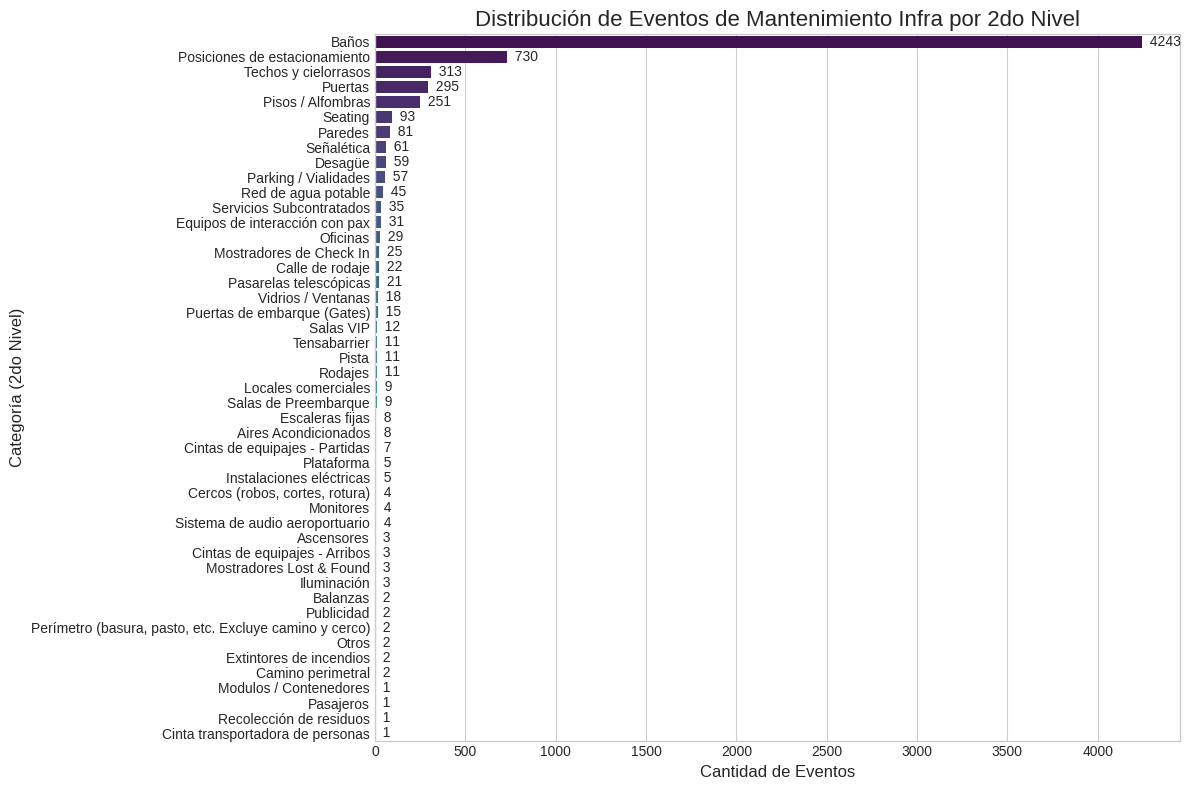

In [49]:
# Contar cuántos eventos hay en cada categoría de la columna '2do Nivel'
conteo_eventos_2do_nivel = df_infra_filtrado['2do Nivel'].value_counts()

# Convertir la serie de conteo en un DataFrame para el gráfico
df_conteo = conteo_eventos_2do_nivel.reset_index()
df_conteo.columns = ['Categoria', 'Cantidad']

# 2. Creación del gráfico de barras
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras con Seaborn
sns.barplot(
    data=df_conteo,
    x='Cantidad',
    y='Categoria',
    orient='h',
    palette='viridis'
)

# Agregar las etiquetas de datos a cada barra
for index, value in enumerate(df_conteo['Cantidad']):
    plt.text(
        value,
        index,
        f'  {value}',
        ha='left',
        va='center',
        fontsize=10
    )

# Configuración final del gráfico
plt.title('Distribución de Eventos de Mantenimiento Infra por 2do Nivel', fontsize=16)
plt.xlabel('Cantidad de Eventos', fontsize=12)
plt.ylabel('Categoría (2do Nivel)', fontsize=12)
plt.tight_layout()
plt.show()


Analisis de baños

/tmp/ipython-input-433708379.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


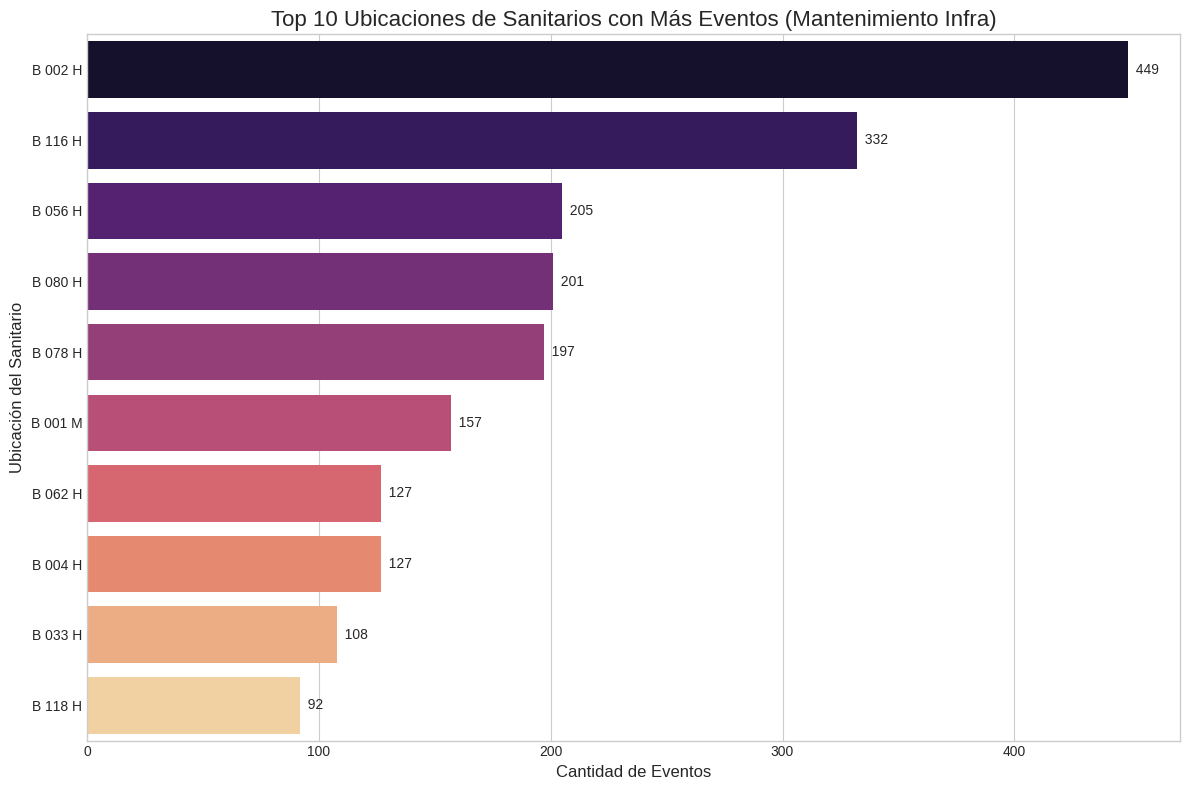

In [50]:
# A continuación, filtra esos datos para incluir solo los eventos de 'Baños'
# y renombra la categoría para el gráfico.
df_sanitarios = df_infra_filtrado[df_infra_filtrado['2do Nivel'] == 'Baños'].copy()

# Contar cuántos eventos hay en cada ubicación de baño ('Ubic. Nivel Dos')
conteo_por_ubicacion = df_sanitarios['Ubic. Nivel Dos'].value_counts()

# Seleccionar solo las 10 ubicaciones con más eventos
top_10_ubicaciones = conteo_por_ubicacion.head(10).reset_index()
top_10_ubicaciones.columns = ['Ubicacion', 'Cantidad de Eventos']

# 2. Creación del gráfico de barras horizontales
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras
sns.barplot(
    data=top_10_ubicaciones,
    x='Cantidad de Eventos',
    y='Ubicacion',
    orient='h',
    palette='magma'
)

# 3. Añadir etiquetas de datos a cada barra
for index, value in enumerate(top_10_ubicaciones['Cantidad de Eventos']):
    plt.text(
        value,
        index,
        f'  {value}',
        ha='left',
        va='center',
        fontsize=10
    )

# Configuración del gráfico
plt.title('Top 10 Ubicaciones de Sanitarios con Más Eventos (Mantenimiento Infra)', fontsize=16)
plt.xlabel('Cantidad de Eventos', fontsize=12)
plt.ylabel('Ubicación del Sanitario', fontsize=12)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2579118677.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


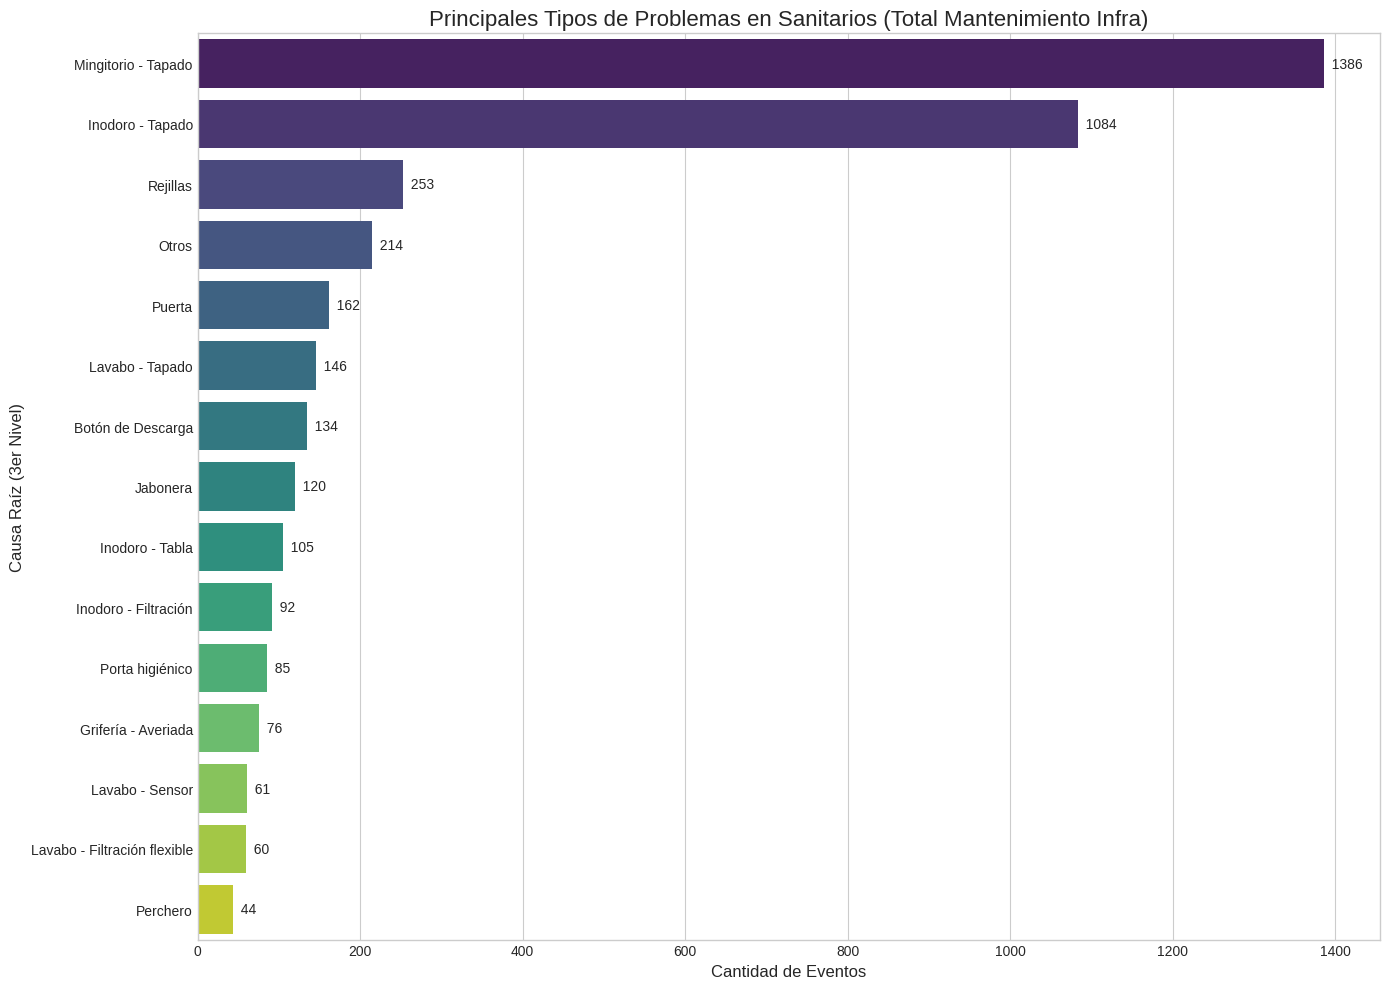

In [52]:
# Filtrar solo los eventos de 'EZE Mantenimiento Infra' que corresponden a 'Baños'
df_sanitarios = df_infra[
    (df_infra['Responsable'] == 'EZE Mantenimiento Infra') &
    (df_infra['2do Nivel'] == 'Baños')
].copy()

# Contar cuántos eventos hay en cada categoría de la columna '3er Nivel'
conteo_eventos_3er_nivel = df_sanitarios['3er Nivel'].value_counts()

# Convertir la serie de conteo en un DataFrame para el gráfico
df_conteo_3er_nivel = conteo_eventos_3er_nivel.reset_index()
df_conteo_3er_nivel.columns = ['Categoria', 'Cantidad']

# Seleccionar las 15 categorías principales para una mejor visualización
top_15_categorias = df_conteo_3er_nivel.head(15)

# 2. Crear el gráfico de barras
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 10))

sns.barplot(
    data=top_15_categorias,
    x='Cantidad',
    y='Categoria',
    orient='h',
    palette='viridis'
)

# Agregar las etiquetas de datos a cada barra
for index, value in enumerate(top_15_categorias['Cantidad']):
    plt.text(
        value,
        index,
        f'  {value}',
        ha='left',
        va='center',
        fontsize=10
    )

# Configurar el gráfico
plt.title('Principales Tipos de Problemas en Sanitarios (Total Mantenimiento Infra)', fontsize=16)
plt.xlabel('Cantidad de Eventos', fontsize=12)
plt.ylabel('Causa Raíz (3er Nivel)', fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipython-input-232885547.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


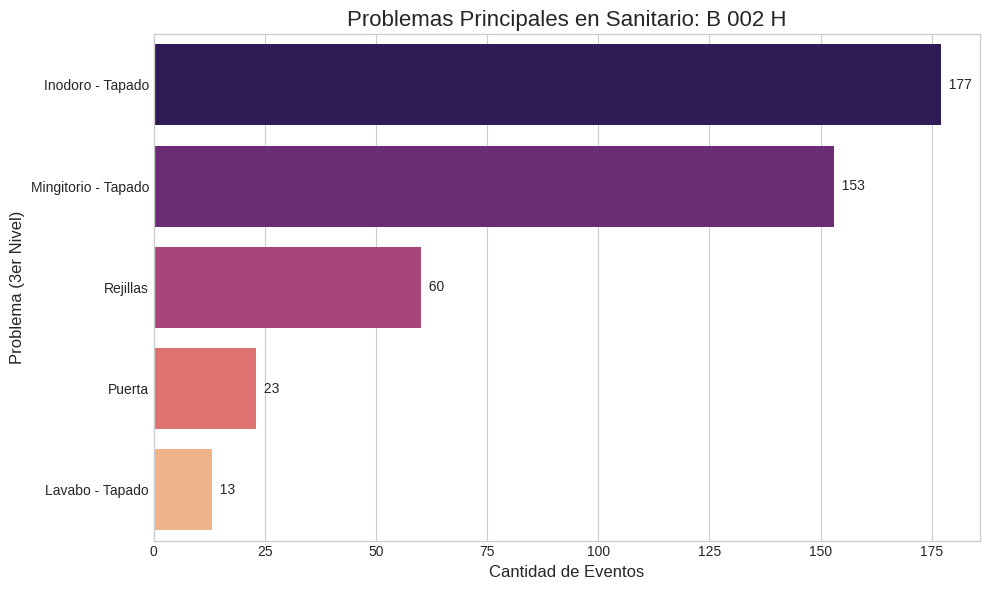

/tmp/ipython-input-232885547.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


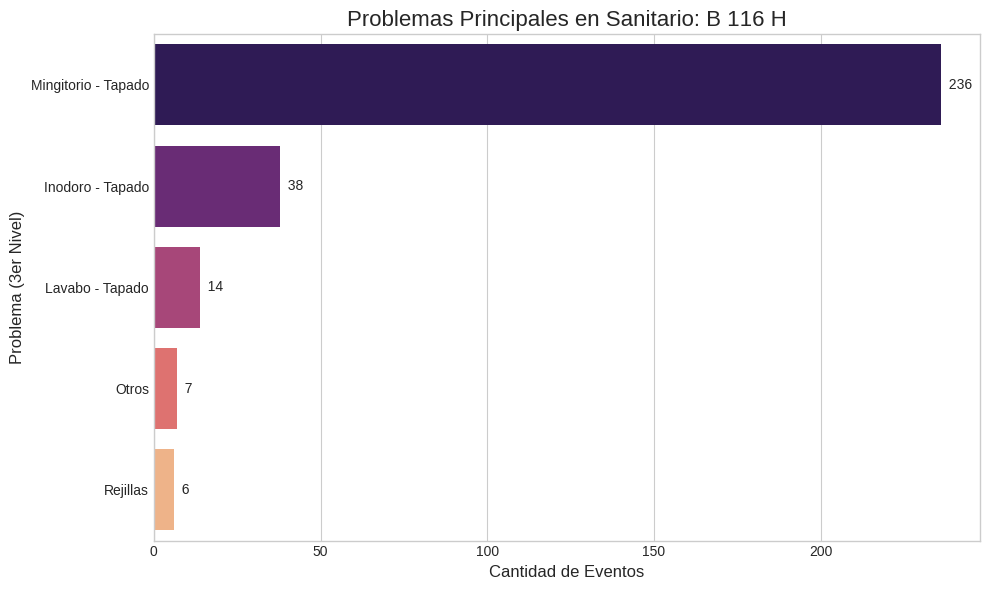

/tmp/ipython-input-232885547.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


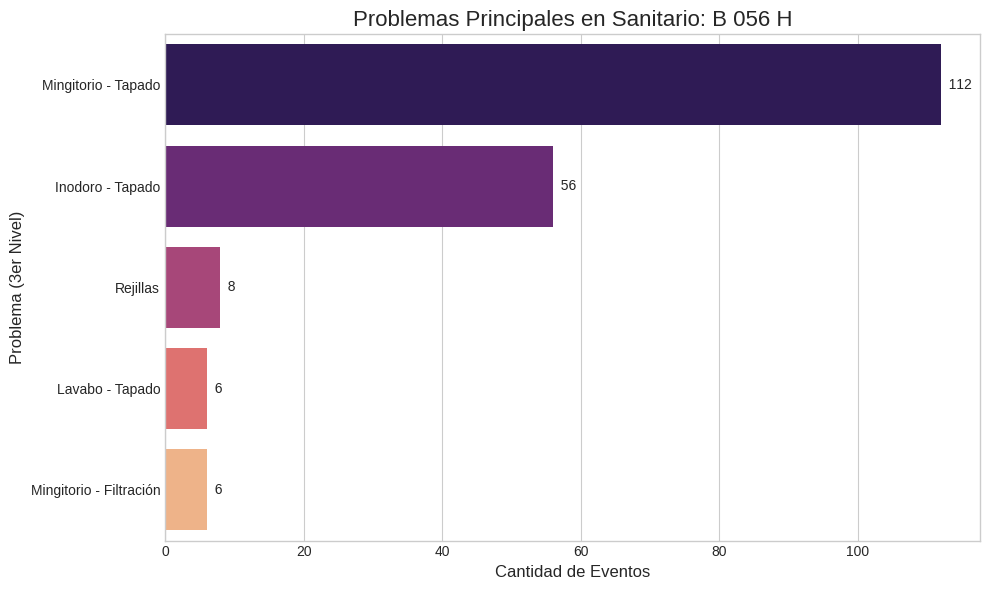

/tmp/ipython-input-232885547.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


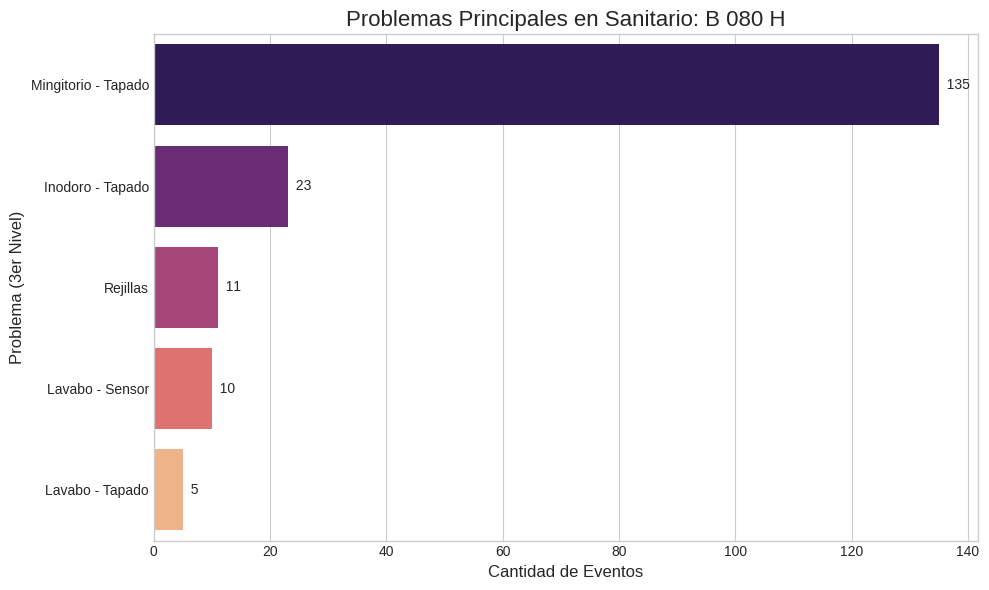

/tmp/ipython-input-232885547.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


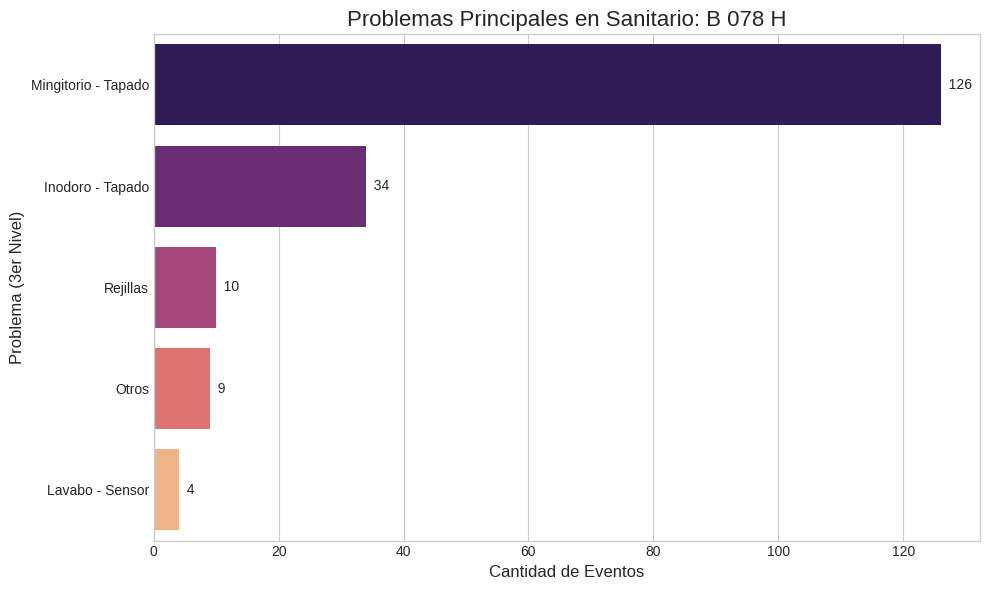

In [53]:
# Filtrar solo los eventos de 'EZE Mantenimiento Infra' en 'Baños'
df_sanitarios = df_infra[
    (df_infra['Responsable'] == 'EZE Mantenimiento Infra') &
    (df_infra['2do Nivel'] == 'Baños')
].copy()

# Identificar los 5 sanitarios con más eventos
top_5_sanitarios = df_sanitarios['Ubic. Nivel Dos'].value_counts().head(5).index.tolist()

# 2. Generar un gráfico de barras para cada uno de los 5 sanitarios principales
for sanitario in top_5_sanitarios:
    # Filtrar los datos para la ubicación de sanitario actual
    df_actual = df_sanitarios[df_sanitarios['Ubic. Nivel Dos'] == sanitario].copy()

    # Contar los problemas en la columna '3er Nivel' para esta ubicación
    conteo_problemas = df_actual['3er Nivel'].value_counts().head(5).reset_index()
    conteo_problemas.columns = ['Problema', 'Cantidad']

    # Crear el gráfico
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(10, 6))

    sns.barplot(
        data=conteo_problemas,
        x='Cantidad',
        y='Problema',
        orient='h',
        palette='magma'
    )

    # Agregar las etiquetas de datos a cada barra
    for index, value in enumerate(conteo_problemas['Cantidad']):
        plt.text(
            value,
            index,
            f'  {value}',
            ha='left',
            va='center',
            fontsize=10
        )

    # Configurar el gráfico
    plt.title(f'Problemas Principales en Sanitario: {sanitario}', fontsize=16)
    plt.xlabel('Cantidad de Eventos', fontsize=12)
    plt.ylabel('Problema (3er Nivel)', fontsize=12)
    plt.tight_layout()
    plt.show()

Eventos segun ubicacion

/tmp/ipython-input-563320507.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


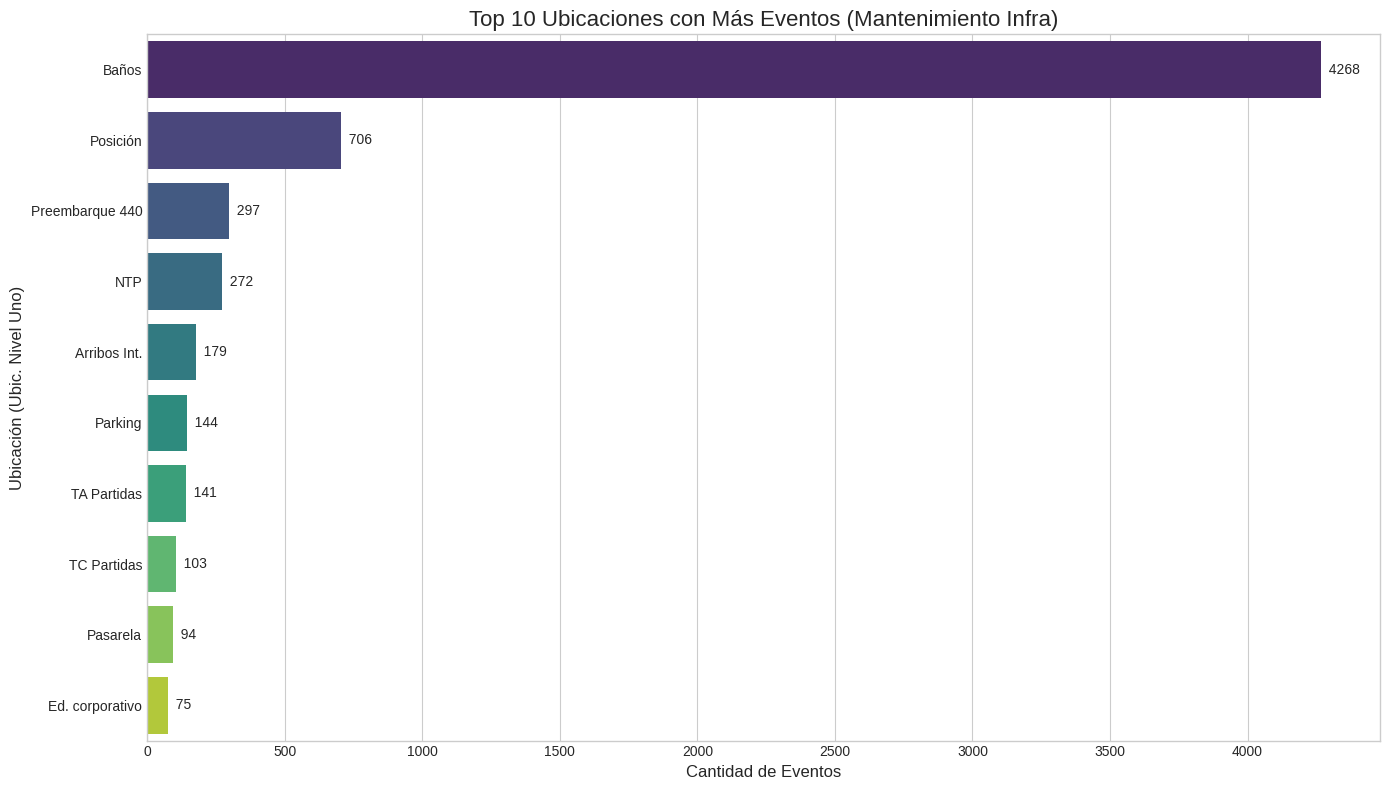

In [54]:
# Contar cuántos eventos hay en cada categoría de la columna 'Ubic. Nivel Uno'
conteo_eventos_ubicacion = df_infra_filtrado['Ubic. Nivel Uno'].value_counts()

# Seleccionar solo las 10 ubicaciones con más eventos
top_10_ubicaciones = conteo_eventos_ubicacion.head(10).reset_index()
top_10_ubicaciones.columns = ['Ubicacion', 'Cantidad']

# Crear el gráfico de barras
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

sns.barplot(
    data=top_10_ubicaciones,
    x='Cantidad',
    y='Ubicacion',
    orient='h',
    palette='viridis'
)

# Agregar las etiquetas de datos a cada barra
for index, value in enumerate(top_10_ubicaciones['Cantidad']):
    plt.text(
        value,
        index,
        f'  {value}',
        ha='left',
        va='center',
        fontsize=10
    )

# Configuración del gráfico
plt.title('Top 10 Ubicaciones con Más Eventos (Mantenimiento Infra)', fontsize=16)
plt.xlabel('Cantidad de Eventos', fontsize=12)
plt.ylabel('Ubicación (Ubic. Nivel Uno)', fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipython-input-4224563580.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


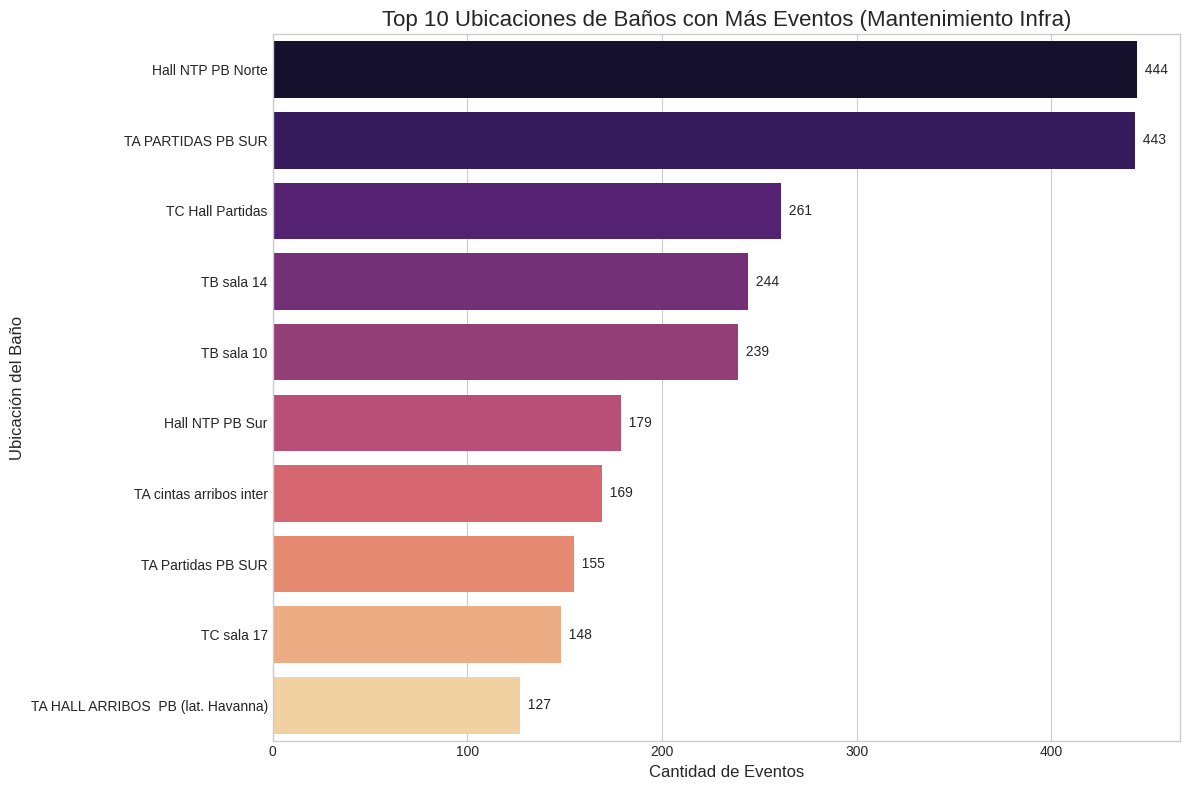

In [55]:
# Filtrar solo los eventos de 'EZE Mantenimiento Infra' que corresponden a 'Baños'
df_baños = df_infra[
    (df_infra['Responsable'] == 'EZE Mantenimiento Infra') &
    (df_infra['2do Nivel'] == 'Baños')
].copy()

# Contar cuántos eventos hay en cada ubicación de baño ('Ubic. Nivel Tres')
conteo_por_ubicacion = df_baños['Ubic. Nivel Tres'].value_counts()

# Seleccionar solo las 10 ubicaciones con más eventos
top_10_ubicaciones = conteo_por_ubicacion.head(10).reset_index()
top_10_ubicaciones.columns = ['Ubicacion', 'Cantidad de Eventos']

# 2. Creación del gráfico de barras horizontales
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

sns.barplot(
    data=top_10_ubicaciones,
    x='Cantidad de Eventos',
    y='Ubicacion',
    orient='h',
    palette='magma'
)

# 3. Añadir etiquetas de datos a cada barra
for index, value in enumerate(top_10_ubicaciones['Cantidad de Eventos']):
    plt.text(
        value,
        index,
        f'  {value}',
        ha='left',
        va='center',
        fontsize=10
    )

# Configuración del gráfico
plt.title('Top 10 Ubicaciones de Baños con Más Eventos (Mantenimiento Infra)', fontsize=16)
plt.xlabel('Cantidad de Eventos', fontsize=12)
plt.ylabel('Ubicación del Baño', fontsize=12)
plt.tight_layout()
plt.show()

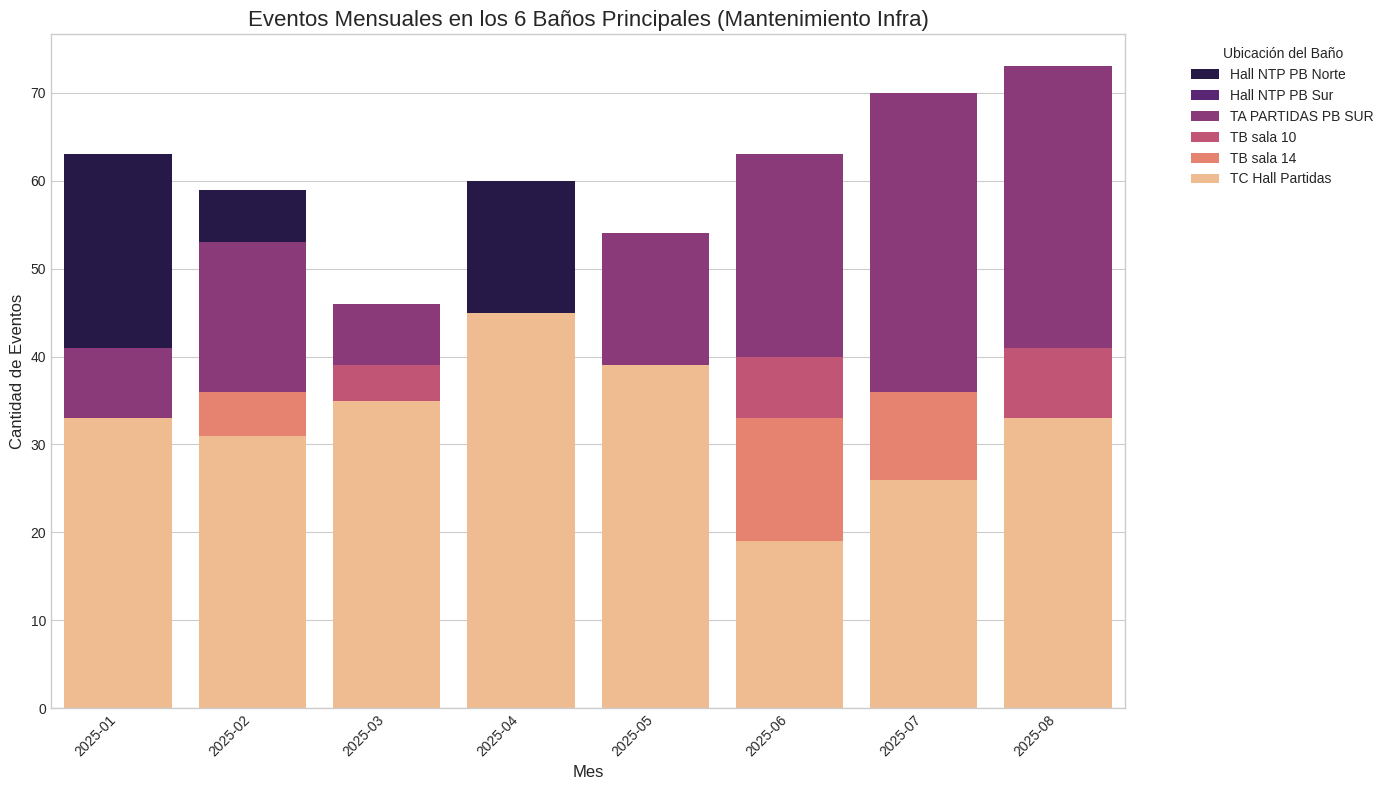

In [56]:
# 1. Preparar los datos
# Filtrar solo los eventos de 'EZE Mantenimiento Infra' que corresponden a 'Baños'
df_baños = df_infra[
    (df_infra['Responsable'] == 'EZE Mantenimiento Infra') &
    (df_infra['2do Nivel'] == 'Baños')
].copy()

# Identificar las 6 ubicaciones de baños con más eventos
top_6_ubicaciones = df_baños['Ubic. Nivel Tres'].value_counts().head(6).index.tolist()

# Filtrar los datos solo para esas 6 ubicaciones principales
df_top_6_baños = df_baños[df_baños['Ubic. Nivel Tres'].isin(top_6_ubicaciones)].copy()

# Agregar el mes de inicio del evento para el análisis mensual
df_top_6_baños['Mes'] = df_top_6_baños['Fec. Inicio'].dt.to_period('M').astype(str)

# Agrupar y contar los eventos por mes y por ubicación
conteo_mensual = df_top_6_baños.groupby(['Mes', 'Ubic. Nivel Tres']).size().reset_index(name='Cantidad de Eventos')

# 2. Crear el gráfico de barras apiladas
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

# Usar el gráfico de barras apiladas para mostrar la distribución mensual
sns.barplot(
    data=conteo_mensual,
    x='Mes',
    y='Cantidad de Eventos',
    hue='Ubic. Nivel Tres',
    palette='magma',
    dodge=False  # Esto es lo que hace que las barras se apilen
)

# Configurar el gráfico
plt.title('Eventos Mensuales en los 6 Baños Principales (Mantenimiento Infra)', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de Eventos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Ubicación del Baño', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

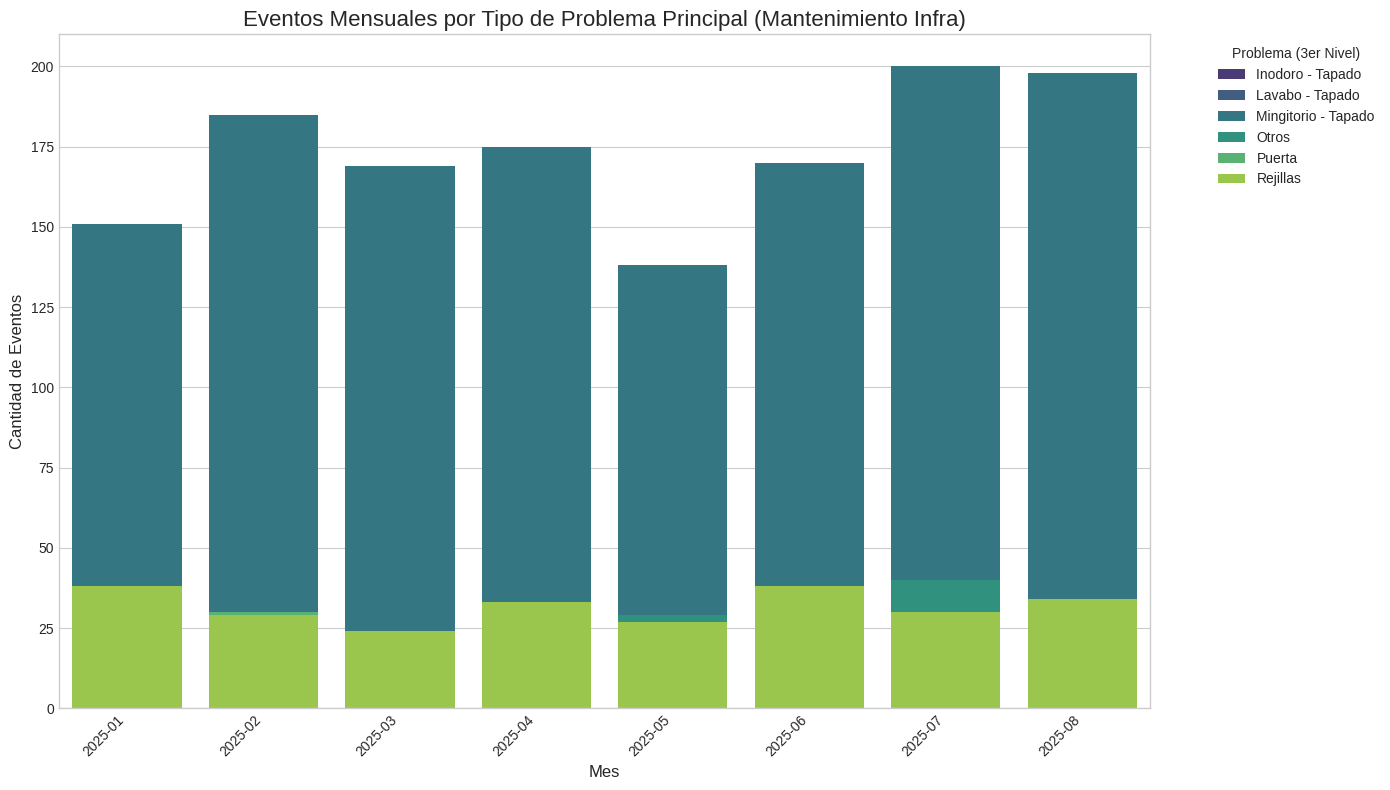

In [57]:
# 1. Preparación de los datos
# Asegurar que la columna de fecha es de tipo datetime
df_infra['Fec. Inicio'] = pd.to_datetime(df_infra['Fec. Inicio'], dayfirst=True, errors='coerce')

# Filtrar solo los eventos de 'EZE Mantenimiento Infra' que corresponden a 'Baños'
df_sanitarios = df_infra[
    (df_infra['Responsable'] == 'EZE Mantenimiento Infra') &
    (df_infra['2do Nivel'] == 'Baños')
].copy()

# Identificar los 6 principales tipos de problemas (3er Nivel) para el gráfico
# La imagen que subiste nos muestra que 'Mingitorio - Tapado', 'Inodoro - Tapado', etc., son los más comunes.
# Reemplaza la lista a continuación con los que te interesen si son diferentes.
top_6_problemas = [
    'Mingitorio - Tapado',
    'Inodoro - Tapado',
    'Rejillas',
    'Otros',
    'Puerta',
    'Lavabo - Tapado'
]

# Filtrar los datos para incluir solo estos 6 tipos de problemas
df_eventos_filtrados = df_sanitarios[df_sanitarios['3er Nivel'].isin(top_6_problemas)].copy()

# Agregar el mes de inicio del evento para el análisis mensual
df_eventos_filtrados['Mes'] = df_eventos_filtrados['Fec. Inicio'].dt.to_period('M').astype(str)

# Agrupar y contar los eventos por mes y por tipo de problema
conteo_mensual = df_eventos_filtrados.groupby(['Mes', '3er Nivel']).size().reset_index(name='Cantidad de Eventos')

# 2. Creación del gráfico de barras apiladas
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

# Usar el gráfico de barras apiladas para mostrar la distribución mensual
sns.barplot(
    data=conteo_mensual,
    x='Mes',
    y='Cantidad de Eventos',
    hue='3er Nivel',
    palette='viridis',
    dodge=False  # Esto es lo que hace que las barras se apilen
)

# Configuración del gráfico
plt.title('Eventos Mensuales por Tipo de Problema Principal (Mantenimiento Infra)', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de Eventos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Problema (3er Nivel)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

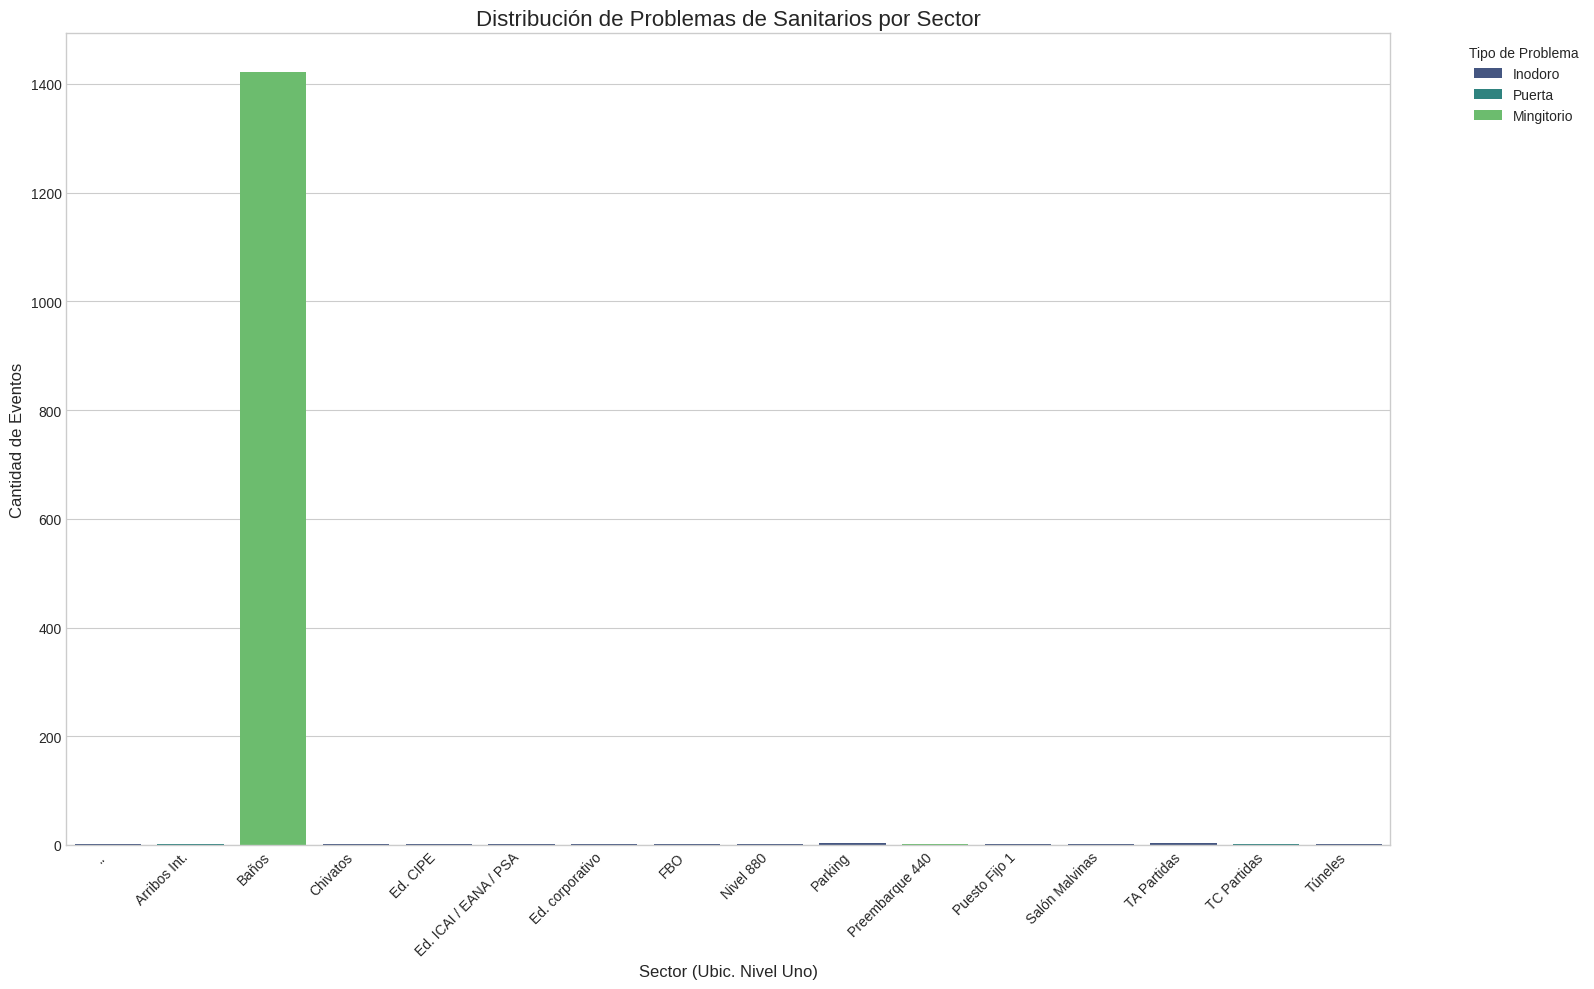

In [61]:
# 1. Preparación de los datos
# Filtrar solo los eventos de 'EZE Mantenimiento Infra' que corresponden a 'Baños'
df_sanitarios = df_infra[
    (df_infra['Responsable'] == 'EZE Mantenimiento Infra') &
    (df_infra['2do Nivel'] == 'Baños')
].copy()

# Crear una nueva columna para categorizar los problemas principales
def categorizar_problema(problema):
    if 'Inodoro' in str(problema):
        return 'Inodoro'
    elif 'Mingitorio' in str(problema):
        return 'Mingitorio'
    elif 'Puerta' in str(problema):
        return 'Puerta'
    else:
        return 'Otros'

df_sanitarios['Categoria_Problema'] = df_sanitarios['3er Nivel'].apply(categorizar_problema)

# Filtrar solo los eventos que corresponden a las categorías principales
df_problemas_filtrados = df_sanitarios[df_sanitarios['Categoria_Problema'].isin(['Inodoro', 'Mingitorio', 'Puerta'])].copy()

# Agrupar los datos por ubicación (Ubic. Nivel Uno) y por la nueva categoría de problema
conteo_por_sector = df_problemas_filtrados.groupby(['Ubic. Nivel Uno', 'Categoria_Problema']).size().reset_index(name='Cantidad de Eventos')

# 2. Creación del gráfico de barras apiladas
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(16, 10))

# Crear el gráfico
sns.barplot(
    data=conteo_por_sector,
    x='Ubic. Nivel Uno',
    y='Cantidad de Eventos',
    hue='Categoria_Problema',
    palette='viridis',
    dodge=False
)

# Configuración del gráfico
plt.title('Distribución de Problemas de Sanitarios por Sector', fontsize=16)
plt.xlabel('Sector (Ubic. Nivel Uno)', fontsize=12)
plt.ylabel('Cantidad de Eventos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Problema', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

A QUE LLAMAN BAÑOS ?

TOP mingitorio con eventos segun ubicacion

In [63]:
# 1. Preparar los datos
# Filtrar solo los eventos de 'EZE Mantenimiento Infra' que corresponden a 'Mingitorio'
df_mingitorios = df_infra[
    (df_infra['Responsable'] == 'EZE Mantenimiento Infra') &
    (df_infra['3er Nivel'].str.contains('Mingitorio', na=False, case=False))
].copy()

# 2. Encontrar las 5 ubicaciones más frecuentes en la columna 'Ubic. Nivel Tres'
# La columna 'Ubic. Nivel Tres' es la más detallada para los baños.
top_5_ubicaciones = df_mingitorios['Ubic. Nivel Tres'].value_counts().head(5).reset_index()
top_5_ubicaciones.columns = ['Ubicacion', 'Cantidad de Eventos']

print("Las 5 ubicaciones con la mayor cantidad de eventos de mingitorios son:")
print(top_5_ubicaciones)

Las 5 ubicaciones con la mayor cantidad de eventos de mingitorios son:
            Ubicacion  Cantidad de Eventos
0   Hall NTP PB Norte                  240
1  TA PARTIDAS PB SUR                  155
2          TB sala 14                  136
3          TB sala 10                  128
4    TC Hall Partidas                  121


TOP inodoro con eventos segun ubicacion

In [64]:
# 1. Preparar los datos
# Filtrar solo los eventos de 'EZE Mantenimiento Infra' que corresponden a 'Inodoro - Tapado'
df_inodoros_tapados = df_infra[
    (df_infra['Responsable'] == 'EZE Mantenimiento Infra') &
    (df_infra['3er Nivel'] == 'Inodoro - Tapado')
].copy()

# 2. Encontrar las 5 ubicaciones más frecuentes en la columna 'Ubic. Nivel Tres'
top_5_ubicaciones = df_inodoros_tapados['Ubic. Nivel Tres'].value_counts().head(5).reset_index()
top_5_ubicaciones.columns = ['Ubicacion', 'Cantidad de Eventos']

print("Las 5 ubicaciones con la mayor cantidad de eventos de inodoro tapado son:")
print(top_5_ubicaciones)

Las 5 ubicaciones con la mayor cantidad de eventos de inodoro tapado son:
                 Ubicacion  Cantidad de Eventos
0       TA PARTIDAS PB SUR                  175
1  TA cintas arribos inter                   86
2         TC Hall Partidas                   86
3       TA Partidas PB SUR                   61
4        Hall NTP PB Norte                   61


TOP Rejillas con eventos segun ubicacion

In [65]:
# Filtrar solo los eventos de 'EZE Mantenimiento Infra' que corresponden a 'Rejillas'
df_rejillas = df_infra[
    (df_infra['Responsable'] == 'EZE Mantenimiento Infra') &
    (df_infra['3er Nivel'] == 'Rejillas')
].copy()

# 2. Encontrar las 5 ubicaciones más frecuentes en la columna 'Ubic. Nivel Tres'
top_5_ubicaciones_rejillas = df_rejillas['Ubic. Nivel Tres'].value_counts().head(5).reset_index()
top_5_ubicaciones_rejillas.columns = ['Ubicacion', 'Cantidad de Eventos']

print("Las 5 ubicaciones con la mayor cantidad de eventos de rejillas son:")
print(top_5_ubicaciones_rejillas)

Las 5 ubicaciones con la mayor cantidad de eventos de rejillas son:
            Ubicacion  Cantidad de Eventos
0  TA PARTIDAS PB SUR                   60
1  TA Partidas PB SUR                   28
2          TB sala 10                   13
3          TB sala 14                   11
4    TC Hall Partidas                   10


TOP puertas con eventos segun ubicacion

In [66]:
# 1. Preparar los datos
# Filtrar solo los eventos de 'EZE Mantenimiento Infra' que corresponden a 'Puertas'
df_puertas = df_infra[
    (df_infra['Responsable'] == 'EZE Mantenimiento Infra') &
    (df_infra['3er Nivel'] == 'Puerta')
].copy()

# 2. Encontrar las 5 ubicaciones más frecuentes en la columna 'Ubic. Nivel Tres'
top_5_ubicaciones_puertas = df_puertas['Ubic. Nivel Tres'].value_counts().head(5).reset_index()
top_5_ubicaciones_puertas.columns = ['Ubicacion', 'Cantidad de Eventos']

print("Las 5 ubicaciones con la mayor cantidad de eventos de puertas son:")
print(top_5_ubicaciones_puertas)

Las 5 ubicaciones con la mayor cantidad de eventos de puertas son:
                 Ubicacion  Cantidad de Eventos
0       TA PARTIDAS PB SUR                   20
1       TA Partidas PB SUR                   15
2  TA cintas arribos inter                   13
3     TC Partidas Cabotaje                   12
4        Hall NTP PB Norte                   12


#Conclusion

Es altamente probable que la causa raíz sea un problema estructural de las tuberías en esas areas. Los datos sugieren que se debe investigar la capacidad, el estado y el diseño de la red de plomería

Además, estos problemas no están distribuidos de manera uniforme, sino que se concentran en ubicaciones específicas. Según los gráficos, los lugares con la mayor cantidad de eventos de mingitorios e inodoros tapados son:

Hall NTP PB Norte

TA Partidas PB Sur

TC Hall Partidas



Ubicación	Eventos de

Mingitorio Tapado	Eventos de Inodoro Tapado

Hall NTP PB Norte	240	                  61
TA Partidas PB Sur	155	                175
TB sala 14	        128	                86
TB sala 10         	136                	86
TC Hall Partidas	  121               	61

Prioriza una inspección profunda en la plomería de estas ubicaciones. La implementación de un plan de mantenimiento preventivo enfocado en la limpieza y el estado de las tuberías en estos sectores podría reducir significativamente los eventos y optimizar los recursos. (lo sugerido por Riffo)
